In [ ]:
# See through the cifar-10 dataset and display some image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision

import gc

import os
import sys

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_path = "/content/drive/My Drive/CIFAR10"
os.makedirs(drive_path, exist_ok=True)

In [ ]:
# Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(
    root=drive_path, train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root=drive_path, train=False, download=True, transform=transform
)

100%|██████████| 170M/170M [00:03<00:00, 43.5MB/s]


Extracting /content/drive/My Drive/CIFAR10/cifar-10-python.tar.gz to /content/drive/My Drive/CIFAR10
Files already downloaded and verified


In [ ]:
len(train_dataset), len(test_dataset)  # 50000 train and 10000 test data

(50000, 10000)

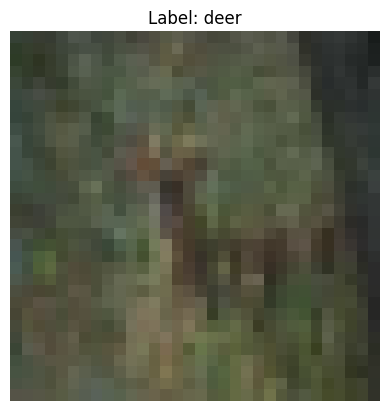

In [ ]:
# Access one instance from the train_dataset
image, label = train_dataset[
    10
]  # Replace 0 with any index to view a different instance

# Convert the image tensor to a NumPy array for visualization
image = np.transpose(
    image.numpy(), (1, 2, 0)
)  # Rearrange dimensions from (C, H, W) to (H, W, C)

# CIFAR-10 class names
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# Display the image with its label
plt.imshow(image)
plt.title(f"Label: {classes[label]}")  # Map the label to its class name
plt.axis("off")
plt.show()

In [ ]:
# Convert train and test datasets to tensors
train_images_tensor = torch.stack(
    [train_dataset[i][0] for i in range(len(train_dataset))]
)
train_labels_tensor = torch.tensor(
    [train_dataset[i][1] for i in range(len(train_dataset))]
)

test_images_tensor = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
test_labels_tensor = torch.tensor(
    [test_dataset[i][1] for i in range(len(test_dataset))]
)

print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")

# Convert tensors to NumPy arrays
train_images_numpy = train_images_tensor.numpy()
train_labels_numpy = train_labels_tensor.numpy()

test_images_numpy = test_images_tensor.numpy()
test_labels_numpy = test_labels_tensor.numpy()

print(f"Train images NumPy shape: {train_images_numpy.shape}")
print(f"Train labels NumPy shape: {train_labels_numpy.shape}")
print(f"Test images NumPy shape: {test_images_numpy.shape}")
print(f"Test labels NumPy shape: {test_labels_numpy.shape}")


# Clear tensors from memory
del train_images_tensor
del train_labels_tensor
del test_images_tensor
del test_labels_tensor

# Force garbage collection to free up memory
gc.collect()

Train images tensor shape: torch.Size([50000, 3, 32, 32])
Train labels tensor shape: torch.Size([50000])
Test images tensor shape: torch.Size([10000, 3, 32, 32])
Test labels tensor shape: torch.Size([10000])
Train images NumPy shape: (50000, 3, 32, 32)
Train labels NumPy shape: (50000,)
Test images NumPy shape: (10000, 3, 32, 32)
Test labels NumPy shape: (10000,)


8

In [ ]:
train_images_numpy[0].shape

(3, 32, 32)

In [ ]:
train_images_numpy[0].min(), train_images_numpy[0].max()

(0.0, 1.0)

In [ ]:
## MMP's code below

import numpy as np
import scipy.signal as signal


class cnn:
    def __init__(self, input_size, num_kernels, kernel_size):
        self.input_size = input_size
        self.kernel_size = kernel_size
        self.num_kernels = num_kernels

    def __repr__(self):
        return (
            f"cnn(num_input={self.num_input}, num_output={self.num_output}, "
            f"kernel_size={self.kernel_size}, stride={self.stride}, padding={self.padding})"
        )

    def generate_cnn_patches(self, image, stride, padding):
        num_channel, image_h, image_w = image.shape

        # Determine kernel size
        if isinstance(self.kernel_size, int):
            kernel_h = kernel_w = self.kernel_size

        elif isinstance(self.kernel_size, tuple):
            kernel_h, kernel_w = self.kernel_size

        # Add padding if necessary
        if padding > 0:
            padded_image = np.pad(
                image,
                pad_width=((0, 0), (padding, padding), (padding, padding)),
                mode="constant",
                constant_values=0,
            )
        else:
            padded_image = image

        # Initialize storage for patches
        patches = []

        for channel in range(num_channel):
            channel_patch = []

            for i in range(0, image_h - kernel_h + 1, stride):

                for j in range(0, image_w - kernel_w + 1, stride):
                    patch = padded_image[channel, i : i + kernel_h, j : j + kernel_w]
                    channel_patch.append(patch)

            channel_patch = np.array(channel_patch)
            patches.append(channel_patch)

        patches = np.array(patches)

        return patches

    def convolute(self, patch, kernel):
        conv_mat = signal.correlate2d(patch, kernel, mode="valid")

        return conv_mat

    def convolve(self, img, stride, padding):

        patches = self.generate_cnn_patches(img, stride, padding)
        num_channels, input_h, input_w = (
            img.shape
        )  ##need to indexing value for right shape

        self.output_shape = (
            self.num_kernels,
            input_h - self.kernel_size + 1,
            input_w - self.kernel_size + 1,
        )
        self.kernels_shape = (
            self.num_kernels,
            num_channels,
            self.kernel_size,
            self.kernel_size,
        )
        self.kernels = np.random.rand(*self.kernels_shape)
        self.biases = np.random.rand(*self.output_shape)
        self.output = np.zeros(
            (
                self.num_kernels,
                input_h - self.kernel_size + 1,
                input_w - self.kernel_size + 1,
            )
        )

        print("kernels = ", self.kernels)

        for i in range(self.num_kernels):
            y = 0
            for kernel in self.kernels[i]:
                l = 0
                k = 0
                for patch in patches[y]:
                    self.output[i][k][l] += self.convolute(patch, kernel)
                    l += 1

                    if l >= input_w - self.kernel_size + 1:
                        l = 0
                        k += 1
                y += 1

        return self.output

    # def max_pooling(self, convolved_img, stride)

    # def generate_cnn_patches(self, image):
    #     num_channel, image_h, image_w = image.shape

    #     if isinstance(self.kernel_size, int):
    #         kernel_h = kernel_w = self.kernel_size
    #     elif isinstance(self.kernel_size, tuple):
    #         kernel_h, kernel_w = self.kernel_size

    #     if self.padding > 0:
    #         image = np.pad(image, pad_width=((self.padding, self.padding), (self.padding, self.padding) (0,0)), mode='constant', constant_values=0)

    #     output_height = (image_h -  kernel_h) // self.stride + 1
    #     output_width = (image_w - kernel_w) // self.stride + 1

    #     patches = []

    #     for i in range(0, output_height - kernel_h + 1, self.stride):
    #         for j in range(0, output_width - kernel_w + 1, self.stride):
    #             patch = image[i:i+kernel_h, j:kernel_w, :]
    #             patches.append(patch)

    #     return patches